Importacions

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
import warnings
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

Dataset: https://www.kaggle.com/datasets/shrutimehta/nasa-asteroids-classification

**Objectiu**

Volem saber si un asteroide és potencialment perillós i com de greu és el perill que comporta.

# **PART 1: ¿Es perillós o no?**

In [ ]:
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/nasa.csv')
pd.set_option('display.max_columns', None)
df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,6.275369e+07,3.899334e+07,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,5.729815e+07,3.560342e+07,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7.622912e+06,4.736658e+06,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,4.268362e+07,2.652237e+07,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,6.101082e+07,3.791037e+07,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,323.612307,2016-09-08,1473318000000,22.154265,79755.354273,49556.875548,0.041361,16.089413,6.187511e+06,3.844741e+06,Earth,4,2017-04-06 08:24:07,8,0.019777,5.156,2457637.5,0.361512,1.161429,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,44.670934,2016-09-08,1473318000000,3.225150,11610.539577,7214.337772,0.006469,2.516399,9.677324e+05,6.013211e+05,Earth,2,2017-04-06 08:23:58,6,0.006451,5.742,2458000.5,0.073200,1.075134,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,562.373736,2016-09-08,1473318000000,7.191642,25889.910626,16086.983633,0.061009,23.732393,9.126775e+06,5.671115e+06,Earth,17,2017-04-06 08:23:43,6,0.059972,4.410,2458000.5,0.368055,1.528234,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,37597

Es llegeix el dataset i es fa el dataframe. Es revisa el seu número de columnes i files. També faig que es puguin llegir totes les columnes amb pd.set_option.

A continuació es revisa si hi han dades nules.

In [ ]:
df.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

No hi ha cap data nula així que no cal esborrar res. A continuació reviso si el dataframe està balançejat o no. Vull que hi hagi un nombre similar d'asteroides perillosos i no perillosos per evitar fer un sobreajust cap a una de les dues possibilitats si aquesta fos massa majoritària.

In [ ]:
df['Hazardous'].value_counts()

False    3932
True      755
Name: Hazardous, dtype: int64

El dataset està desbalançejat cap a asteroides no perillosos. Aprofitant que el dataset es força gran, faré una selecció aleatòria d'una cinquena part dels asteroides no perillosos i utilitzaré aquesta part. Així queden 755 perillosos i 786 no perillosos.

In [ ]:
Perill=df[df['Hazardous']]
No_Perill=df[df['Hazardous']==False]
No_Perill_Elegits=No_Perill.sample(frac=0.20,random_state=0)
No_Perill_Elegits

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
755,3387334,3387334,24.400,0.035039,0.078350,35.039264,78.350176,0.021772,0.048685,114.958219,257.054393,1999-10-08,939366000000,10.260373,36937.342456,22951.428150,0.060053,23.360579,8983786.0,5.582266e+06,Earth,11,2017-04-06 09:05:54,7,0.005682,8.152,2458000.5,0.534664,0.690297,3.597700,185.582607,209.484654,0.321220,12.689573,1.059374,2.458056e+06,264.641874,1.718503,J2000,False
442,3634155,3634155,23.600,0.050647,0.113250,50.647146,113.250461,0.031471,0.070371,166.165182,371.556643,1997-11-22,880185600000,2.194398,7899.832315,4908.648585,0.182916,71.154236,27363810.0,1.700308e+07,Earth,16,2017-04-06 08:46:16,3,0.055087,5.194,2458000.5,0.184837,1.226841,3.786531,198.886429,496.341875,1.000076,288.229455,1.453606,2.457807e+06,140.610900,0.725307,J2000,False
1656,3648643,3648643,24.500,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,245.485039,2004-10-15,1097823600000,6.888930,24800.149502,15409.848450,0.195168,75.920418,29196742.0,1.814201e+07,Earth,12,2017-04-06 08:44:33,7,0.015715,5.645,2458000.5,0.402980,1.081029,4.341888,8.729539,410.539044,0.645396,115.374005,1.516662,2.457878e+06,107.439216,0.876896,J2000,False
857,3603632,3603632,20.800,0.183889,0.411188,183.888672,411.187571,0.114263,0.255500,603.309311,1349.040631,2000-05-15,958374000000,8.751474,31505.307211,19576.172695,0.466643,181.524155,69808808.0,4.337718e+07,Earth,9,2017-09-20 07:42:06,3,0.366627,3.982,2458000.5,0.275577,1.792319,17.069550,224.175265,876.438099,1.298398,60.318520,2.286240,2.457898e+06,42.232165,0.410753,J2000,False
4271,3775253,3775253,26.582,0.012828,0.028684,12.827883,28.684017,0.007971,0.017823,42.086230,94.107672,2015-06-15,1434351600000,6.750520,24301.871052,15100.237599,0.014818,5.764056,2216685.0,1.377384e+06,Earth,5,2017-07-12 06:17:47,5,0.002561,4.328,2458000.5,0.368775,1.574128,1.372160,263.231988,721.370407,0.993629,29.409608,2.154626,2.457945e+06,27.500138,0.499050,J2000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2751,3477942,3477942,24.100,0.040230,0.089958,40.230458,89.958039,0.024998,0.055897,131.989696,295.137932,2009-11-22,1258876800000,12.035914,43329.289935,26923.135738,0.055402,21.551531,8288079.5,5.149974e+06,Earth,12,2017-04-06 08:59:05,8,0.009771,8.569,2455157.5,0.608419,0.649676,4.000836,64.168480,191.268563,0.254401,172.249204,1.044951,2.455248e+06,189.813518,1.882170,J2000,False
3030,3360486,3360486,18.900,0.441118,0.986370,441.118200,986.370281,0.274098,0.612902,1447.238235,3236.123074,2011-02-15,1297756800000,14.125661,50852.379151,31597.690812,0.339961,132.244690,50857388.0,3.160132e+07,Earth,14,2017-04-06 09:07:32,1,0.099700,7.325,2458000.5,0.183031,0.784679,24.765512,311.026334,253.884449,0.641058,318.567642,0.928299,2.457985e+06,22.664283,1.417968,J2000,False
4282,3720443,3720443,22.300,0.092163,0.206082,92.162655,206.081961,0.057267,0.128053,302.370925,676.121942,2015-07-08,1436338800000,5.556071,20001.854260,12428.374388,0.159952,62.221287,23928464.0,1.486846e+07,Earth,25,2017-04-06 08:33:25,4,0.159308,3.371,2458000.5,0.510606,2.337606,6.434129,237.377858,1305.435780,1.144012,56.092746,3.531201,2.458525e+06,215.289149,0.275770,J2000,False
902,3743610,374

Ara si que tenim un dataset balançejat respecte perillosos i no perillosos.

In [ ]:
dff = pd.concat([Perill, No_Perill_Elegits])
dff['Hazardous'].value_counts()

False    786
True     755
Name: Hazardous, dtype: int64

Sembla que hi ha columnes que no tenen informació rellevant o son totes la mateixa.

In [ ]:
dff['Equinox'].value_counts()

J2000    1541
Name: Equinox, dtype: int64

In [ ]:
dff['Orbiting Body'].value_counts()

Earth    1541
Name: Orbiting Body, dtype: int64

Equinox i orbiting body son totes la mateixa. Neo Reference ID es la mateixa que Name i cap de les dues ens fa falta. Orbit Determination Date i Epoch Osculation es refereixen a quan s'ha calculat la informació, es irrellevant. Close Approach Date és redundant perquè ja tenim una columna que ho expressa en Epoch Date.

In [ ]:
dff=dff.drop(columns=['Name','Equinox','Neo Reference ID','Orbiting Body','Orbit Determination Date','Close Approach Date','Epoch Osculation',])

In [ ]:
dff

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,17,5,0.025282,4.634,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,22,0,0.043058,4.557,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,25,1,0.034798,5.154,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True
9,21.5,0.133216,0.297879,133.215567,297.879063,0.082776,0.185093,437.058960,977.293544,790761600000,12.899610,46438.594999,28855.136987,0.151806,59.052433,22709816.0,14111226.0,30,0,0.016907,6.623,0.551389,0.876125,2.059577,2.613682,299.535161,0.393040,253.765937,1.359211,2.457901e+06,119.861382,1.201862,True
22,21.7,0.121494,0.271669,121.494041,271.668934,0.075493,0.168807,398.602509,891.302306,793440000000,28.418954,102308.235340,63570.358787,0.048541,18.882595,7261686.5,4512202.5,29,1,0.012875,6.152,0.868419,0.906734,4.035074,342.784208,315.368341,0.119309,322.390496,1.694158,2.453598e+06,303.979299,1.141522,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2751,24.1,0.040230,0.089958,40.230458,89.958039,0.024998,0.055897,131.989696,295.137932,1258876800000,12.035914,43329.289935,26923.135738,0.055402,21.551531,8288079.5,5149974.0,12,8,0.009771,8.569,0.608419,0.649676,4.000836,64.168480,191.268563,0.254401,172.249204,1.044951,2.455248e+06,189.813518,1.882170,False
3030,18.9,0.441118,0.986370,441.118200,986.370281,0.274098,0.612902,1447.238235,3236.123074,1297756800000,14.125661,50852.379151,31597.690812,0.339961,132.244690,50857388.0,31601316.0,14,1,0.099700,7.325,0.183031,0.784679,24.765512,311.026334,253.884449,0.641058,318.567642,0.928299,2.457985e+06,22.664283,1.417968,False
4282,22.3,0.092163,0.206082,92.162655,206.081961,0.057267,0.128053,302.370925,676.121942,1436338800000,5.556071,20001.854260,12428.374388,0.159952,62.221287,23928464.0,14868458.0,25,4,0.159308,3.371,0.510606,2.337606,6.434129,237.377858,1305.435780,1.144012,56.092746,3.531201,2.458525e+06,215.289149,0.275770,False
902,24.1,0.040230,0.089958,40.230458,89.958039,0.024998,0.055897,131.989696,295.137932,965718000000,4.423958,15926.248397,9895.951400,0.338239,131.575073,50599872.0,31441304.0,38,4,0.034409,5.008,0.204316,1.290003,1.642619,114.970299,535.160870,1.026434,101.304252,1.553571,2.458044e+06,330.926308,0.672695,False


Aqui elimino dades que son simplement còpies d'altres columnes per amb altres unitats. També elimino Orbit Uncertainity, que és determinat per quantes observacions tenim de l'asteroide (un asteroide és igual de perillós si l'hem observat o no) ja que seria una mena d'overfitting. Perihelion Time i Close Approach també s'esborra ja que són dades irrellevantes (referent a quan està a prop del Sol i de la Terra)

In [ ]:
dff=dff.drop(dff.iloc[:,3:9],axis=1)
dff=dff.drop(dff.iloc[:,5:6],axis=1)
dff=dff.drop(dff.iloc[:,6:8],axis=1)
dff=dff.drop(columns=['Miles per hour','Miss Dist.(miles)','Orbit Uncertainity','Perihelion Time','Epoch Date Close Approach'])
dff

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit ID,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,6.115834,62753692.0,17,0.025282,4.634,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,264.837533,0.590551,True
2,20.3,0.231502,0.517654,7.590711,7622911.5,22,0.043058,4.557,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,292.893654,0.559371,True
4,21.6,0.127220,0.284472,9.840831,61010824.0,25,0.034798,5.154,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,135.142133,0.726395,True
9,21.5,0.133216,0.297879,12.899610,22709816.0,30,0.016907,6.623,0.551389,0.876125,2.059577,2.613682,299.535161,0.393040,253.765937,1.359211,119.861382,1.201862,True
22,21.7,0.121494,0.271669,28.418954,7261686.5,29,0.012875,6.152,0.868419,0.906734,4.035074,342.784208,315.368341,0.119309,322.390496,1.694158,303.979299,1.141522,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2751,24.1,0.040230,0.089958,12.035914,8288079.5,12,0.009771,8.569,0.608419,0.649676,4.000836,64.168480,191.268563,0.254401,172.249204,1.044951,189.813518,1.882170,False
3030,18.9,0.441118,0.986370,14.125661,50857388.0,14,0.099700,7.325,0.183031,0.784679,24.765512,311.026334,253.884449,0.641058,318.567642,0.928299,22.664283,1.417968,False
4282,22.3,0.092163,0.206082,5.556071,23928464.0,25,0.159308,3.371,0.510606,2.337606,6.434129,237.377858,1305.435780,1.144012,56.092746,3.531201,215.289149,0.275770,False
902,24.1,0.040230,0.089958,4.423958,50599872.0,38,0.034409,5.008,0.204316,1.290003,1.642619,114.970299,535.160870,1.026434,101.304252,1.553571,330.926308,0.672695,False


Orbit ID sembla una variable categòrica, vaig a revisar-ho amb un scatterplot.

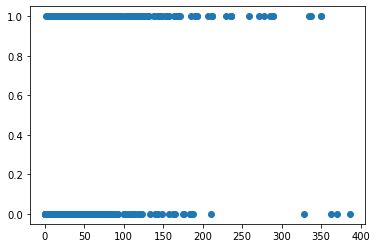

In [ ]:
plt.scatter(dff['Orbit ID'],dff['Hazardous']);


És una variable categòrica, no sembla que el nombre estigui relacionat amb la seva perillositat.

In [ ]:
IDs=dff['Orbit ID']
IDs=pd.get_dummies(IDs)

In [ ]:
dff['Orbit ID'].value_counts()

13     47
12     46
10     46
9      46
8      46
       ..
132     1
207     1
172     1
278     1
362     1
Name: Orbit ID, Length: 156, dtype: int64

Hi ha moltes categories on només hi ha un asteroide (possibilitat de fer overfitting) i a sobre aquesta dada ens afegiria 156 columnes al dataframe. L'elimino.

In [ ]:
dff=dff.drop(columns=['Orbit ID'])

**Visualització de les dades**

In [ ]:
dff_train, dff_test = train_test_split(dff, test_size = 0.3, random_state = 0)

Ara faré un correlograma per visualitzar les relacions entre les diferents variables del dataframe.

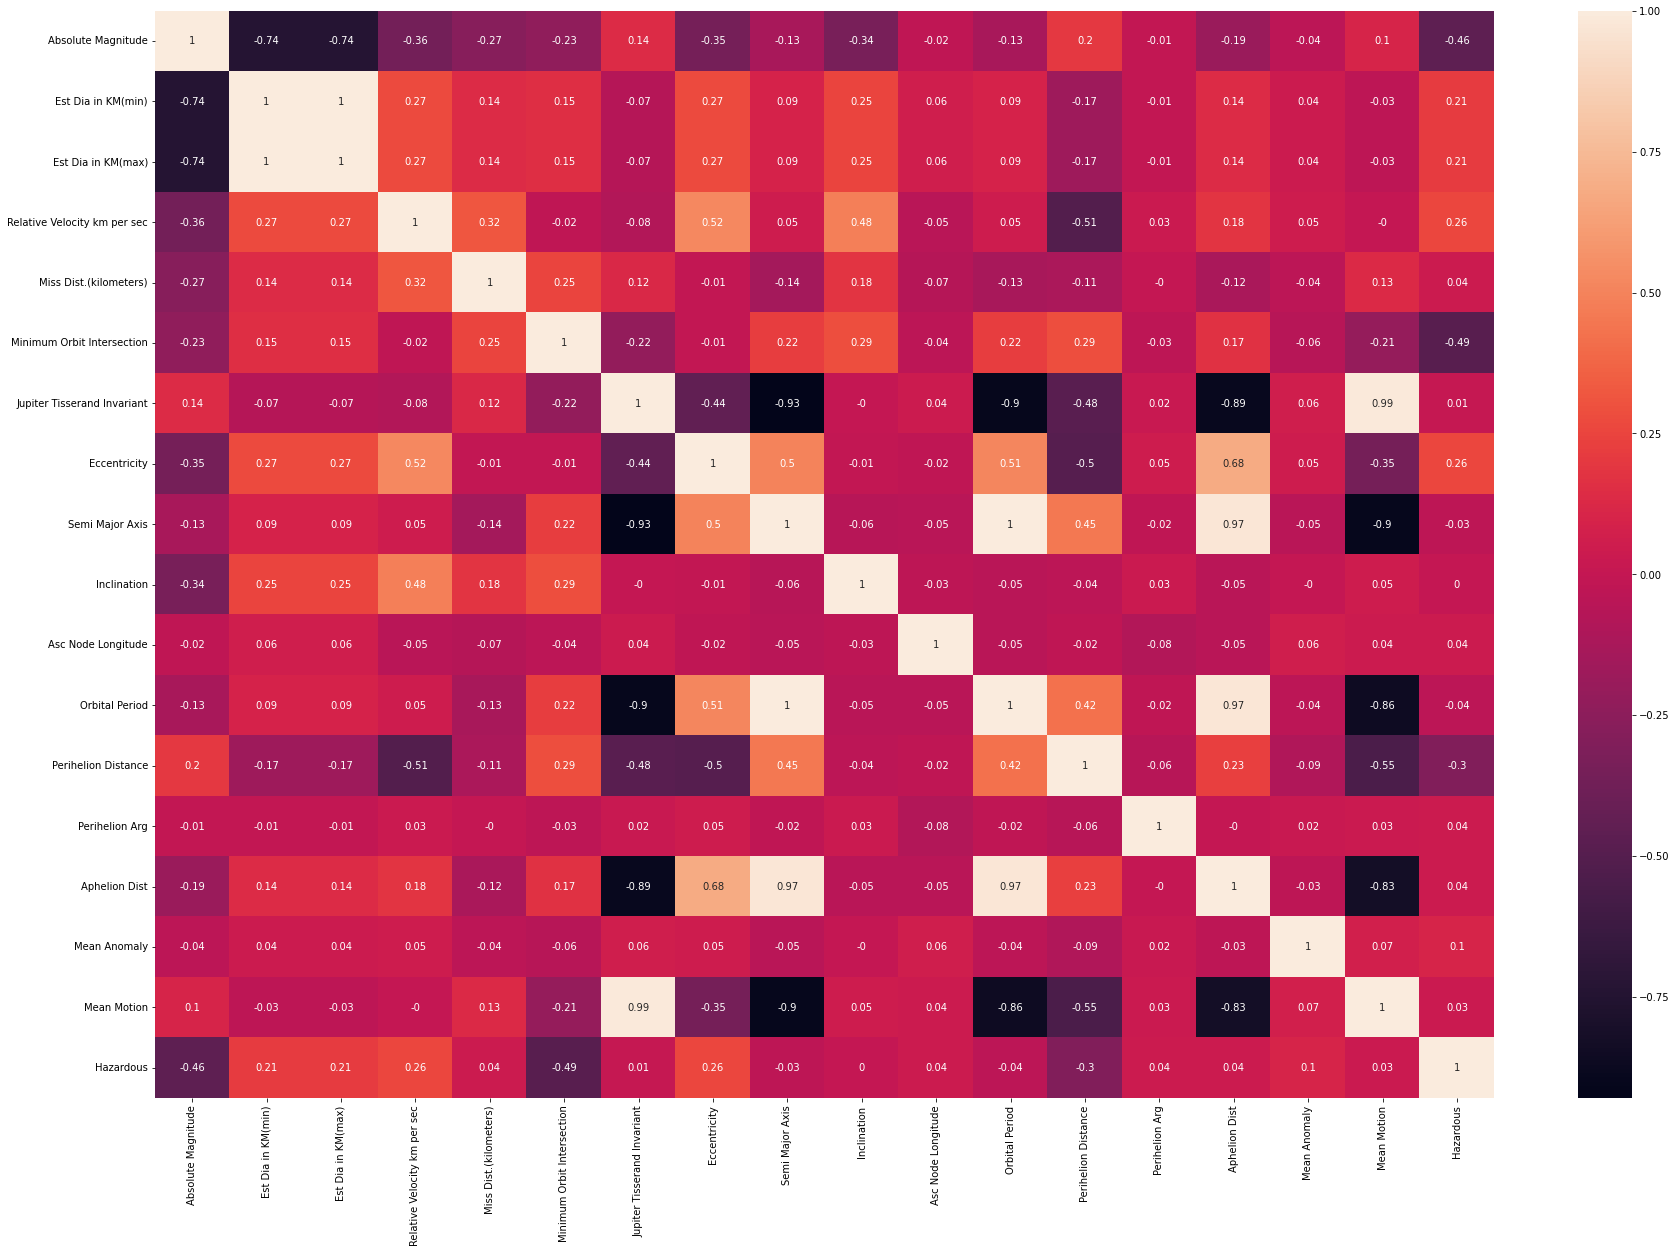

In [ ]:
correlation_matrix = dff_train.corr().round(2)
plt.figure(figsize = (30,20))
sns.heatmap(data = correlation_matrix, annot = True);

Sembla que hi ha una correlació 1 entre diàmetre màxim i mínim, i entre Orbital Period i Semi Major Axis. Eliminaré un de cada, ja que són redundants.

In [ ]:
dff=dff.drop(columns=['Est Dia in KM(min)','Orbital Period'])

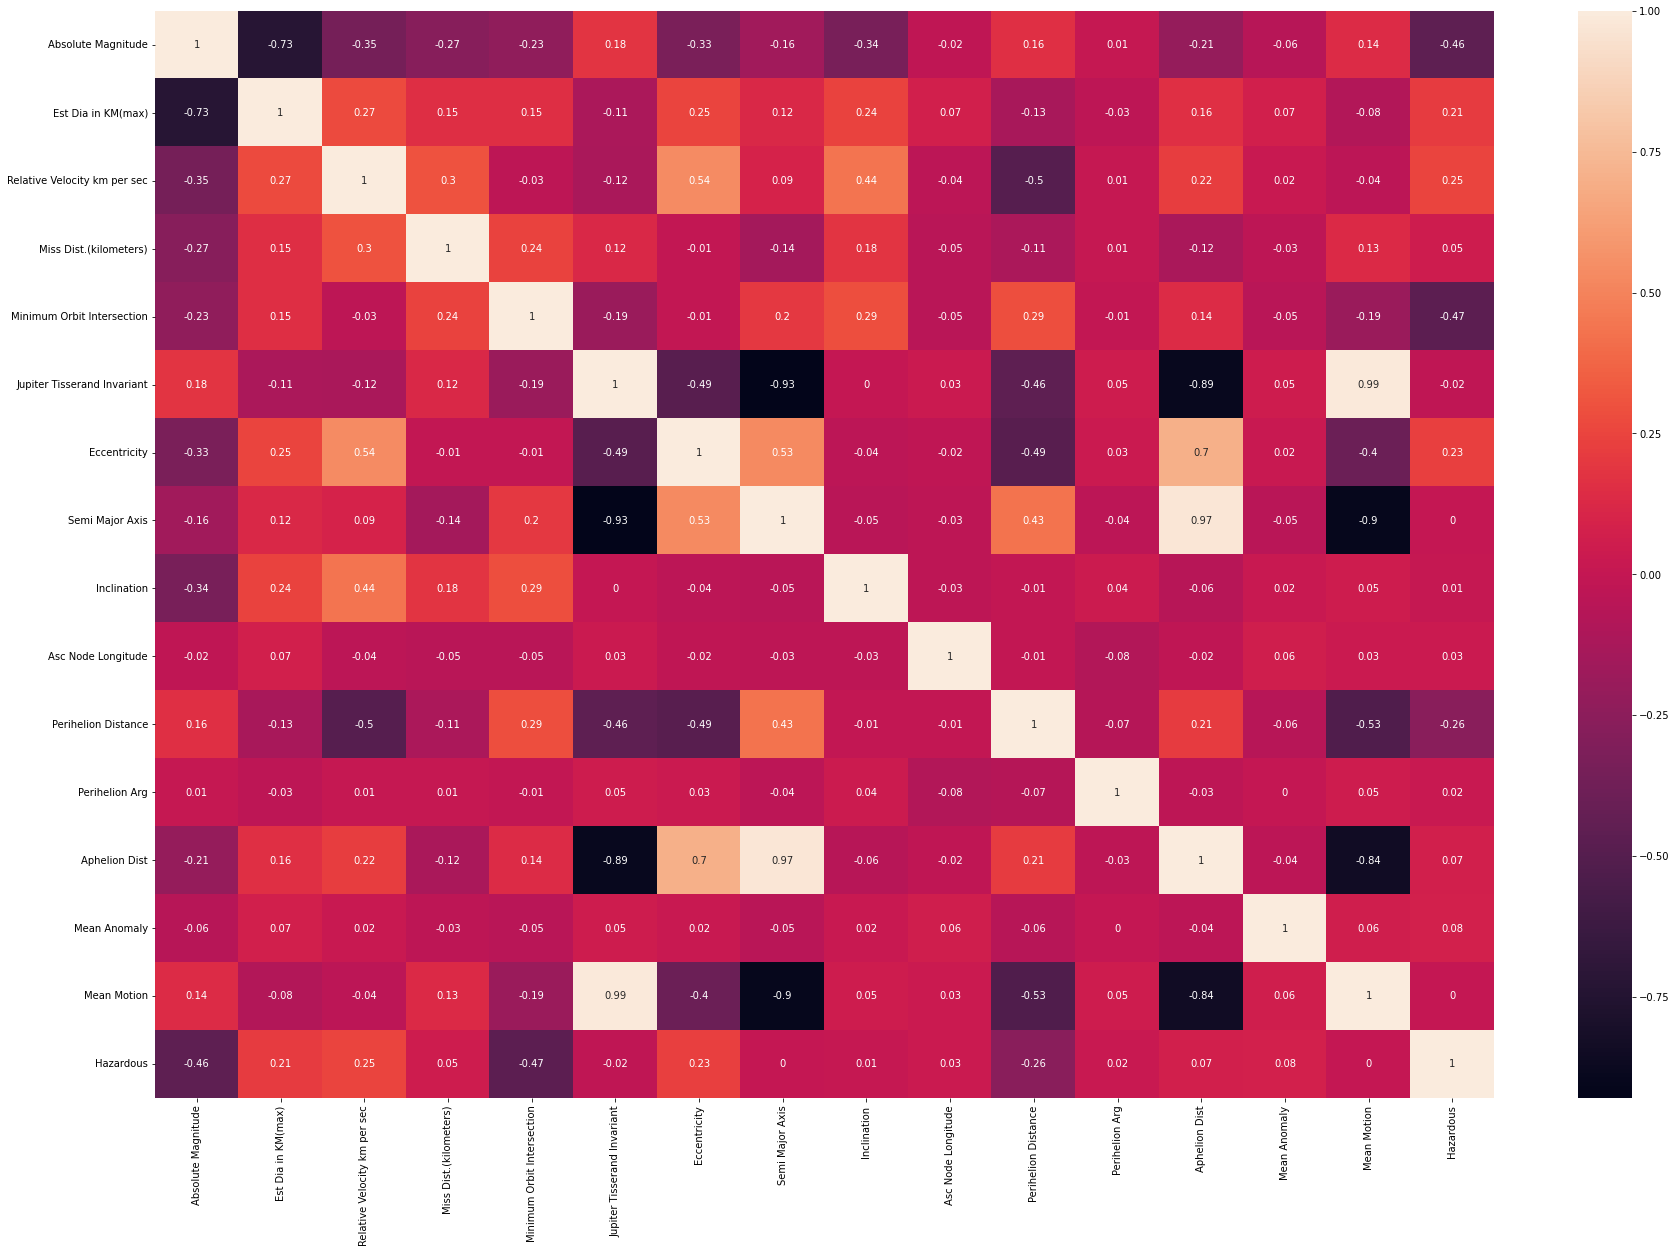

In [ ]:
correlation_matrix = dff.corr().round(2)
plt.figure(figsize = (30,20))
sns.heatmap(data = correlation_matrix, annot = True);

Tenim bastantes columnes de dades, moltes amb correlació baixa. Però, una correlació baixa no vol dir que no hi hagi cap relació, pot ser no lineal. Així que no eliminaré aquestes variables.

Ara separaré la columna objectiu Hazardous de la resta.

In [ ]:
X=dff.drop(columns=['Hazardous'])
y=dff['Hazardous']

Faig describe per veure si hi ha outliers en les dades.

In [ ]:
dff.describe(include="all")

,Absolute Magnitude,Est Dia in KM(max),Relative Velocity km per sec,Miss Dist.(kilometers),Minimum Orbit Intersection,Jupiter Tisserand Invariant,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Mean Motion,Hazardous
count,1541.00000,1541.000000,1541.000000,1.541000e+03,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,786
mean,21.35852,0.563983,15.246531,3.891319e+07,0.058749,5.068929,0.413703,1.387192,13.466866,173.401079,0.762509,181.158225,2.011876,186.183185,0.747285,NaN
std,2.61687,0.666518,7.597492,2.166948e+07,0.074368,1.259648,0.185200,0.513712,11.151986,104.458132,0.238048,100.375743,0.949987,106.400259,0.349236,NaN
min,14.40000,0.002260,1.041673,8.554018e+04,0.000012,2.301000,0.012961,0.615920,0.014513,0.138230,0.092784,0.381037,0.803765,0.571775,0.144091,NaN
25%,19.60000,0.179490,9.775080,2.078530e+07,0.013065,4.073000,0.270834,0.992546,4.925754,82.067850,0.588545,95.652690,1.297393,95.142353,0.458929,NaN
50%,21.00000,0.375008,14.120933,4.007588e+07,0.029855,5.092000,0.409355,1.232326,9.861011,173.498812,0.783879,185.915109,1.648209,191.218485,0.720470,NaN
75%,22.60000,0.714562,19.465608,5.790282e+07,0.067124,6.024000,0.547585,1.664584,19.879969,259.974899,0.950746,263.829149,2.503702,280.610054,0.996731,NaN


No hi ha outliers, totes les dades semblen tenir sentit.

In [ ]:
y=pd.get_dummies(y,drop_first=True)

Estandardització de les dades

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
scaler = preprocessing.StandardScaler()

X_train_std = scaler.fit(X_train).transform(X_train)
X_test_std = scaler.fit(X_train).transform(X_test)

Visualització de PCA per veure les relacions entre les dades.

In [ ]:
pca = PCA(n_components=5)
pca.fit(X_train_std)
print(np.cumsum(pca.explained_variance_ratio_))

[0.29136006 0.48044142 0.59385972 0.67236887 0.73934364]


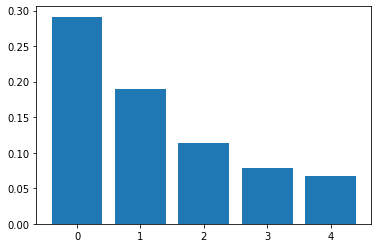

In [ ]:
plt.bar(np.arange(5), pca.explained_variance_ratio_)
plt.xticks(np.arange(5));

No podem reduïr facilment la dimensionalitat, amb 2 dimensions només podríem explicar el 47% de la variància. Encara així podem veure per sobre com estan repartides les dades.

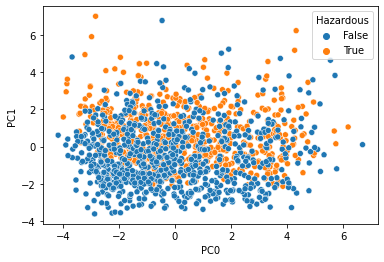

In [ ]:
X_std = preprocessing.StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)
X_pca = pca.transform(X_std)
y = dff["Hazardous"]
pca_df = pd.DataFrame({"PC0": X_pca[:, 0], "PC1": X_pca[:, 1], "Hazardous": dff["Hazardous"]})
sns.scatterplot(x=pca_df["PC0"], y=pca_df["PC1"], hue=dff["Hazardous"]);

Sembla que hi ha una certa separació en les dades però només amb el PCA no podem separar-ho ja que està molt superposat.

**Gràfics de variables amb alta correlació**

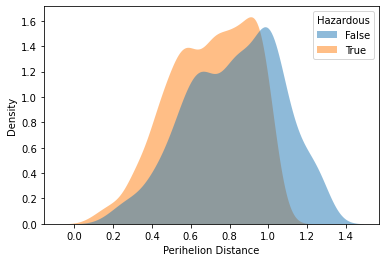

In [ ]:
sns.kdeplot(dff["Perihelion Distance"],hue=dff["Hazardous"],fill=True, common_norm=False,
   alpha=.5, linewidth=0);

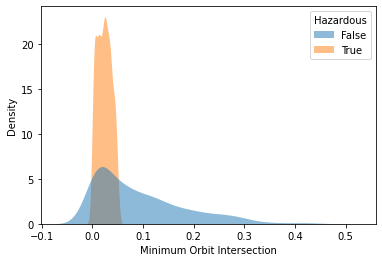

In [ ]:
sns.kdeplot(dff["Minimum Orbit Intersection"],hue=dff["Hazardous"],fill=True, common_norm=False,
   alpha=.5, linewidth=0);

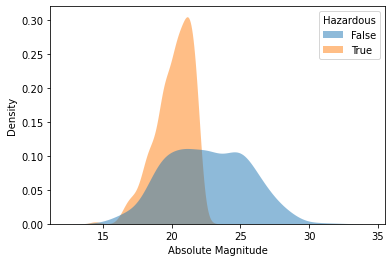

In [ ]:
sns.kdeplot(dff["Absolute Magnitude"],hue=dff["Hazardous"],fill=True, common_norm=False,
   alpha=.5, linewidth=0);

Aquest és un cas de classificació factible, sembla que es poden separar. Utilitzaré els diferents mètodes de classificació.

**Regressió Logística**

In [ ]:
logistic = LogisticRegression()
logistic.fit(X_train_std, y_train)
round(cross_val_score(logistic, X_train_std,y_train, cv=5).mean(), 4)

0.9332

Ja tenim una precisió bastant alta amb la regressió Logística. 

**kNN**

1NN classifier: 0.854 (+/- 0.0296)
2NN classifier: 0.832 (+/- 0.0391)
3NN classifier: 0.856 (+/- 0.0302)
4NN classifier: 0.857 (+/- 0.0349)
5NN classifier: 0.865 (+/- 0.032)
6NN classifier: 0.855 (+/- 0.0356)
7NN classifier: 0.864 (+/- 0.0174)
8NN classifier: 0.873 (+/- 0.0228)
9NN classifier: 0.868 (+/- 0.0195)
10NN classifier: 0.87 (+/- 0.0263)
11NN classifier: 0.867 (+/- 0.0262)
12NN classifier: 0.87 (+/- 0.0252)
13NN classifier: 0.867 (+/- 0.0146)
14NN classifier: 0.877 (+/- 0.0182)
15NN classifier: 0.874 (+/- 0.0283)
16NN classifier: 0.88 (+/- 0.0273)
17NN classifier: 0.874 (+/- 0.0255)
18NN classifier: 0.878 (+/- 0.022)
19NN classifier: 0.866 (+/- 0.0313)
20NN classifier: 0.871 (+/- 0.0257)


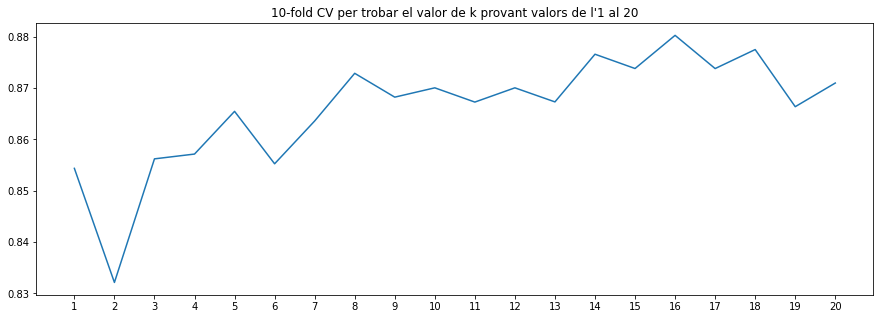

In [ ]:
maxk = 20
models = []
noms = [str(k) + 'NN classifier' for k in range(1, maxk + 1)]

for k in range(1, maxk + 1): models.append(neighbors.KNeighborsClassifier(n_neighbors = k))
resultats_val = []

for nom, model in zip(noms, models):

    scores_val = cross_val_score(model, X_train_std, y_train, cv = 10, scoring = 'accuracy')
    resultats_val.append(scores_val.mean())

    print(f"{nom}: {np.mean(scores_val):.3} (+/- {np.std(scores_val):.3})")

plt.figure(figsize=(15,5))
plt.plot(np.arange(1,21),resultats_val)
plt.title("10-fold CV per trobar el valor de k provant valors de l'1 al 20")
plt.xticks(np.arange(1,21));

Ja en la validació creuada es veu que funciona pitjor que la regressió logística. El deixaré passar.

**SVC**

In [ ]:
Cs = np.logspace(-2, 1, 5)
gammas = np.logspace(-7, 3, 2)
parametres = [{'kernel': ['rbf'], 'C': Cs, 'gamma': gammas}, {'kernel': ['poly'], 'C': Cs, 'degree': np.arange(2, 4)}]

grid = GridSearchCV(SVC(), 
                    param_grid = parametres, 
                    cv = 5, 
                    scoring = 'accuracy', 
                    n_jobs=2)
grid_search = grid.fit(X_train_std, y_train)
grid_search.cv_results_

print("Els millors hiperparàmetres són %s amb una accuracy mitjana de %0.2f"
      % (grid.best_params_, grid.best_score_))

Els millors hiperparàmetres són {'C': 10.0, 'degree': 3, 'kernel': 'poly'} amb una accuracy mitjana de 0.91


Igual que el kNN, funciona pitjor que la regressió logística. No utilitzaré aquest mètode.

**Arbres de Decisió**

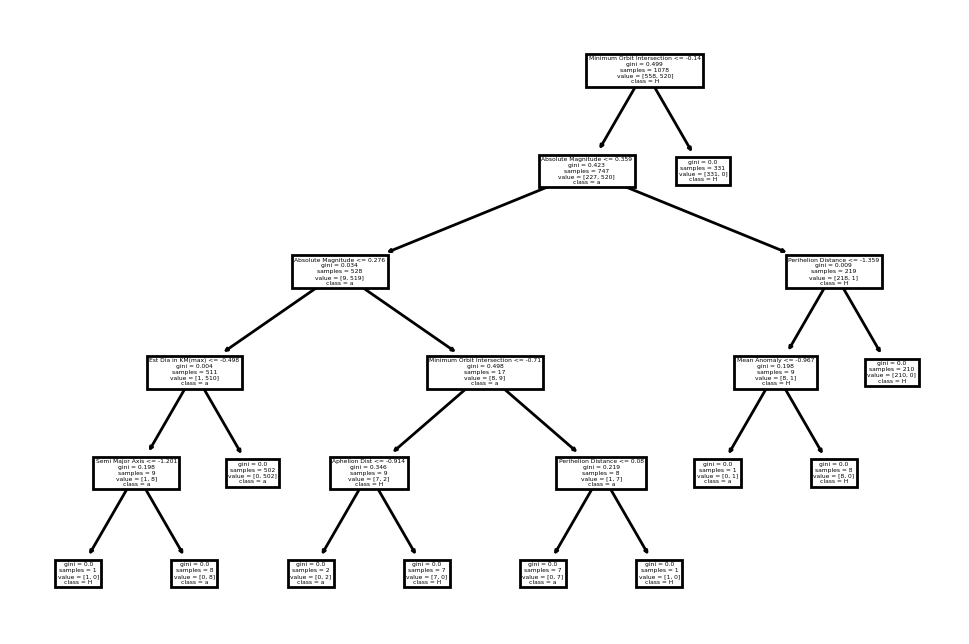

In [ ]:
dtree = DecisionTreeClassifier(random_state=10)
dtree.fit(X_train_std, y_train)
plt.figure(dpi=200)
plot_tree(dtree, impurity=True,  class_names='Hazardous', feature_names=X.columns);

Faig validació creuada.

In [ ]:
round(cross_val_score(dtree, X_train_std,y_train, cv=10).mean(), 4)

0.9916

L'arbre és precís però una mica massa gran, vaig a veure si es possible fer-ho més petit. Així també puc evitar overfitting.

In [ ]:
for depth in range(1,10):
  cut_dtc = DecisionTreeClassifier(random_state=0, criterion="entropy",max_depth=depth)
  cut_dtc.fit(X_train_std, y_train)
  print(f'Depth {depth} Cross Val. Acc.: {round(cross_val_score(cut_dtc, X_train_std, y_train, cv=10).mean(), 4)}')


Depth 1 Cross Val. Acc.: 0.7884
Depth 2 Cross Val. Acc.: 0.9852
Depth 3 Cross Val. Acc.: 0.9852
Depth 4 Cross Val. Acc.: 0.9889
Depth 5 Cross Val. Acc.: 0.9916
Depth 6 Cross Val. Acc.: 0.9898
Depth 7 Cross Val. Acc.: 0.9898
Depth 8 Cross Val. Acc.: 0.9898
Depth 9 Cross Val. Acc.: 0.9898


Sembla que a profunditat 2 hi ha una bona precisió a la validació creuada. Si utilitzo aquest mètode, utilitzaré aquesta profunditat per al test.

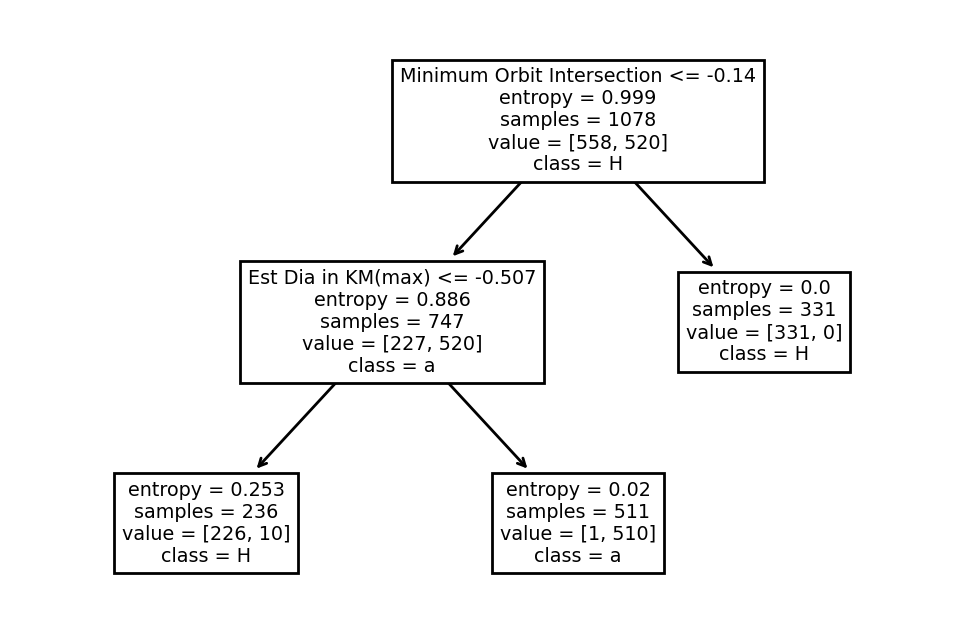

In [ ]:
cut_dtc = DecisionTreeClassifier(random_state=0, criterion="entropy",max_depth=2)
cut_dtc.fit(X_train_std, y_train)
plt.figure(dpi=200)
plot_tree(cut_dtc, impurity=True,  class_names='Hazardous', feature_names=X.columns);

Aquest arbre tindria en compte com d'aprop es creua amb la Terra i la mida de l'asteroide.

**Random Forest**

In [ ]:
rfc = RandomForestClassifier(random_state=0)

In [ ]:
for depth in range(1,10):
  cut_rfc = RandomForestClassifier(random_state=0, criterion="entropy",max_depth=depth)
  cut_rfc.fit(X_train_std, y_train)
  print(f'Depth {depth} Cross Val. Acc.: {round(cross_val_score(cut_rfc, X_train_std, y_train, cv=5).mean(), 4)}')

Depth 1 Cross Val. Acc.: 0.962
Depth 2 Cross Val. Acc.: 0.9889
Depth 3 Cross Val. Acc.: 0.9889
Depth 4 Cross Val. Acc.: 0.9889
Depth 5 Cross Val. Acc.: 0.9916
Depth 6 Cross Val. Acc.: 0.9916
Depth 7 Cross Val. Acc.: 0.9926
Depth 8 Cross Val. Acc.: 0.9944
Depth 9 Cross Val. Acc.: 0.9944


Sembla que la precisió es bastant constant pero augmenta amb la profunditat. El deixarè complet. A la CV el random forest es lleugerament millor que el decision tree, utilitzaré el random forest. Com el random forest no fa overfitting per longitud no el tallaré.

In [ ]:
rfc.fit(X_train_std, y_train)
round(cross_val_score(rfc, X_test_std,y_test, cv=20).mean(), 5)

1.0

El random forest té la precisió més alta a la CV, curiosament de 1. Podria semblar que sigui un cas d'overfitting però no crec que sigui el cas ja que és un cross validation score i no un training score. Utilitzaré aquest mètode.

**TEST**

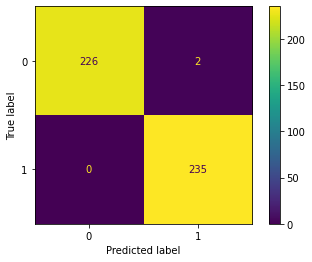

In [ ]:
y_pred = rfc.predict(X_test_std)
confusio = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusio).plot();

In [ ]:
print(classification_report(y_test.values, y_pred,digits=3))

              precision    recall  f1-score   support

           0      1.000     0.991     0.996       228
           1      0.992     1.000     0.996       235

    accuracy                          0.996       463
   macro avg      0.996     0.996     0.996       463
weighted avg      0.996     0.996     0.996       463



**Exemple**

Prenc un asteroide del test, en concret el 101 i el tractaré.

In [ ]:
exemple=X_test.iloc[101]
exemple

Absolute Magnitude              2.100000e+01
Est Dia in KM(max)              3.750075e-01
Relative Velocity km per sec    1.324262e+01
Miss Dist.(kilometers)          4.936100e+07
Minimum Orbit Intersection      1.328480e-02
Jupiter Tisserand Invariant     5.534000e+00
Eccentricity                    2.639759e-01
Semi Major Axis                 1.097798e+00
Inclination                     2.628911e+01
Asc Node Longitude              2.376340e+01
Perihelion Distance             8.080059e-01
Perihelion Arg                  2.622293e+02
Aphelion Dist                   1.387590e+00
Mean Anomaly                    6.224996e+01
Mean Motion                     8.568806e-01
Name: 1277, dtype: float64

In [ ]:
exemple=X_test.iloc[101:102].to_numpy()
exemple_escalat = scaler.transform(exemple)
exemple_escalat
rfc.predict(exemple_escalat)

array([1], dtype=uint8)

El codi pren la entrada 101 del test i prediu si és perillós o no. Hem obtingut 1, per tant si és perillós.

**Importàncies**

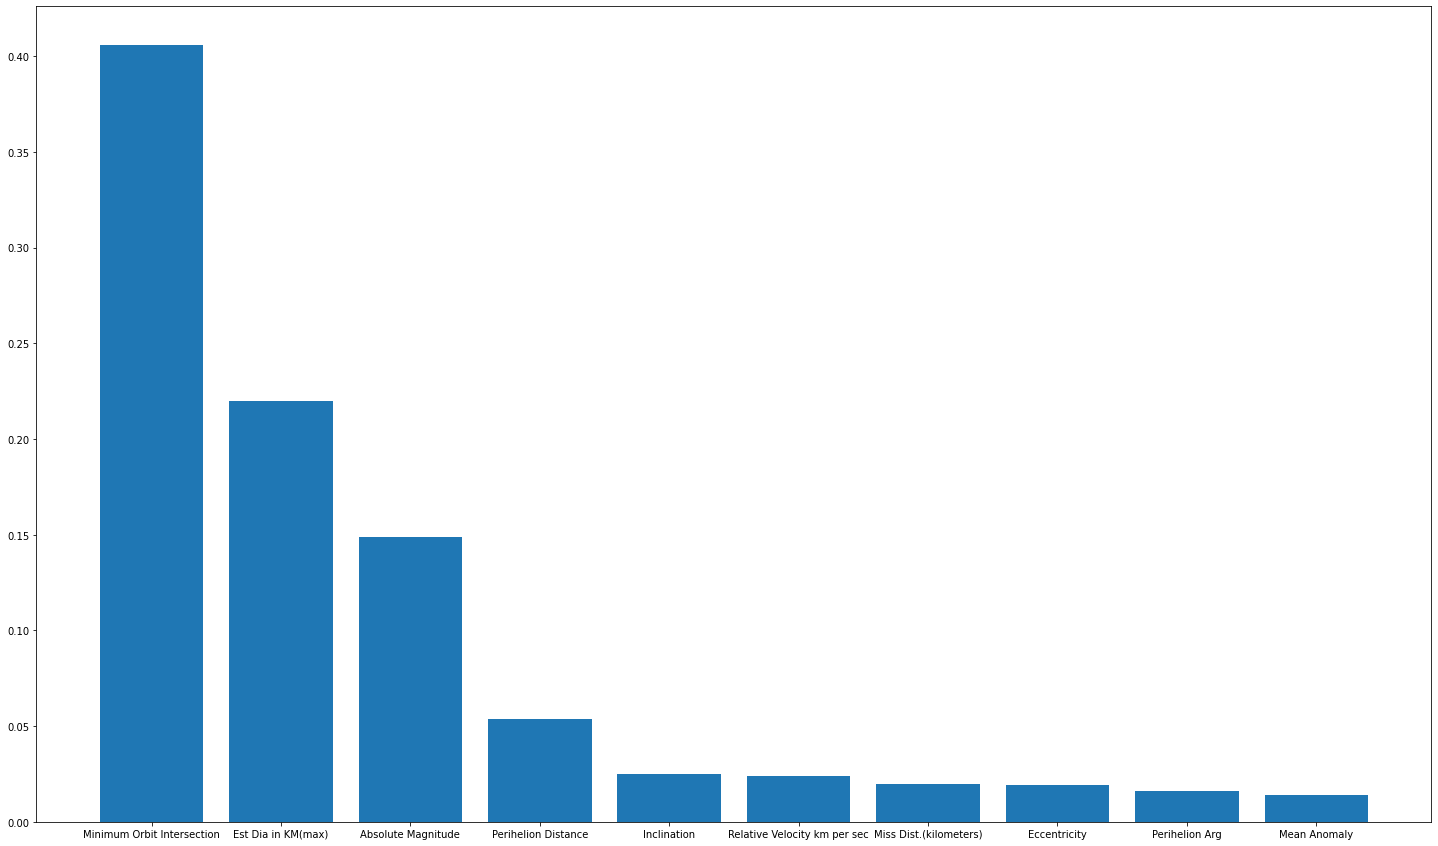

In [ ]:
features = pd.Series(rfc.feature_importances_, index=X_test.columns)
features.sort_values(ascending=False, inplace=True)
importances=features.head(10)
plt.figure(figsize=(25, 15))
plt.bar(*zip(*importances.items()));

Minimum Orbit Intersection és la variable amb més pes per a determinar si és perillós o no l'asteroide. El seu valor es la distància a la que l'asteroide creua l'òrbita de la Terra, té sentit que tingui aquest pes.

**CONCLUSIÓ PART 1**

Utilitzant random forest es pot classificar amb una precisió molt alta, gairebé de 1, la seva perillositat. El model és molt satisfactori.

Aquesta elevada precisió pot resultar inesperada ja que a la visualització inicial no els grups no es separaven perfectament. A partir de les importàncies podem veure que encara que hi havien moltes variables, només 3 s'han utilitzat de forma significativa. Sembla que les variables estàn relacionades entre elles i no fan falta totes per classificar. Només importa realment com d'aprop creua l'òrbita de la Terra i com de gran és l'asteroide.

# **PART 2: Predir l'energia cinètica a partir de la resta de dades.**

Ja sabem si l'asteroide es perillós o no però ara volem saber quines són les possibles consequències d'un impacte. Això podria determinar el nivell de vigilància que caldria prendre. 

La gravetat de l'impacte vé determinada per l'energia cinètica de l'asteroide. El nostre objectiu serà prediure de forma aproximada aquesta energia cinètica.

**Creació de la nova variable**

L'energia cinètica vé definida per (m/2)*v^2. Podem utilitzar les dades del diàmetre estimat i de la velocitat relativa. Podem aproximar la velocitat d'impacte sumant la velocitat relativa de l'asteroide i la velocitat d'escapament de la Terra (quant accelerarà al caure al planeta).
Assumo una densitat promig de 2000 kg/m^3 i un asteroide esfèric.
Seguirem utilitzant el diàmetre màxim, en aquesta situació és preferible ser pessimistes.

In [ ]:
def EnCinet(diametre,velocitat,densitat):
  radi=(diametre/2)*1000
  volum=(4/3)*3.1413*radi**3
  massa=volum*densitat
  velenm=(velocitat+11)*1000
  return np.log10(0.5*massa*velenm**2)

In [ ]:
dff['Energia Cinetica']=EnCinet(dff['Est Dia in KM(max)'],dff['Relative Velocity km per sec'],2000)

Funció per calcular l'energia cinètica expressada en escala logarítmica decimal per facilitar el seu tractament.

In [ ]:
dff=dff.drop(columns='Hazardous')

Aquesta columna no la farem servir. Ja no ens importa si és perillós o no.

In [ ]:
dfn=dff.drop(columns=['Est Dia in KM(max)','Relative Velocity km per sec'])

Aquestes dues columnes ja no ens fan falta perquè la de l'energia cinètica està determinada per aquestes columnes. No aporten dades noves.

In [ ]:
dfn.describe()

,Absolute Magnitude,Miss Dist.(kilometers),Minimum Orbit Intersection,Jupiter Tisserand Invariant,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Mean Motion,Energia Cinetica
count,1541.00000,1.541000e+03,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000
mean,21.35852,3.891319e+07,0.058749,5.068929,0.413703,1.387192,13.466866,173.401079,0.762509,181.158225,2.011876,186.183185,0.747285,19.029618
std,2.61687,2.166948e+07,0.074368,1.259648,0.185200,0.513712,11.151986,104.458132,0.238048,100.375743,0.949987,106.400259,0.349236,1.673968
min,14.40000,8.554018e+04,0.000012,2.301000,0.012961,0.615920,0.014513,0.138230,0.092784,0.381037,0.803765,0.571775,0.144091,12.709932
25%,19.60000,2.078530e+07,0.013065,4.073000,0.270834,0.992546,4.925754,82.067850,0.588545,95.652690,1.297393,95.142353,0.458929,18.142381
50%,21.00000,4.007588e+07,0.029855,5.092000,0.409355,1.232326,9.861011,173.498812,0.783879,185.915109,1.648209,191.218485,0.720470,19.292182
75%,22.60000,5.790282e+07,0.067124,6.024000,0.547585,1.664584,19.879969,259.974899,0.950746,263.829149,2.503702,280.610054,0.996731,20.174362
max,32.10000,7.478160e+07,0.457575,9.025000,0.926733,3.603392,75.406667,359.905890,1.298823,359.856838,6.065788,359.398736,2.039000,23.620600


**Visualització de dades**

In [ ]:
dfn_train, dfn_test = train_test_split(dfn, test_size = 0.3, random_state = 0)

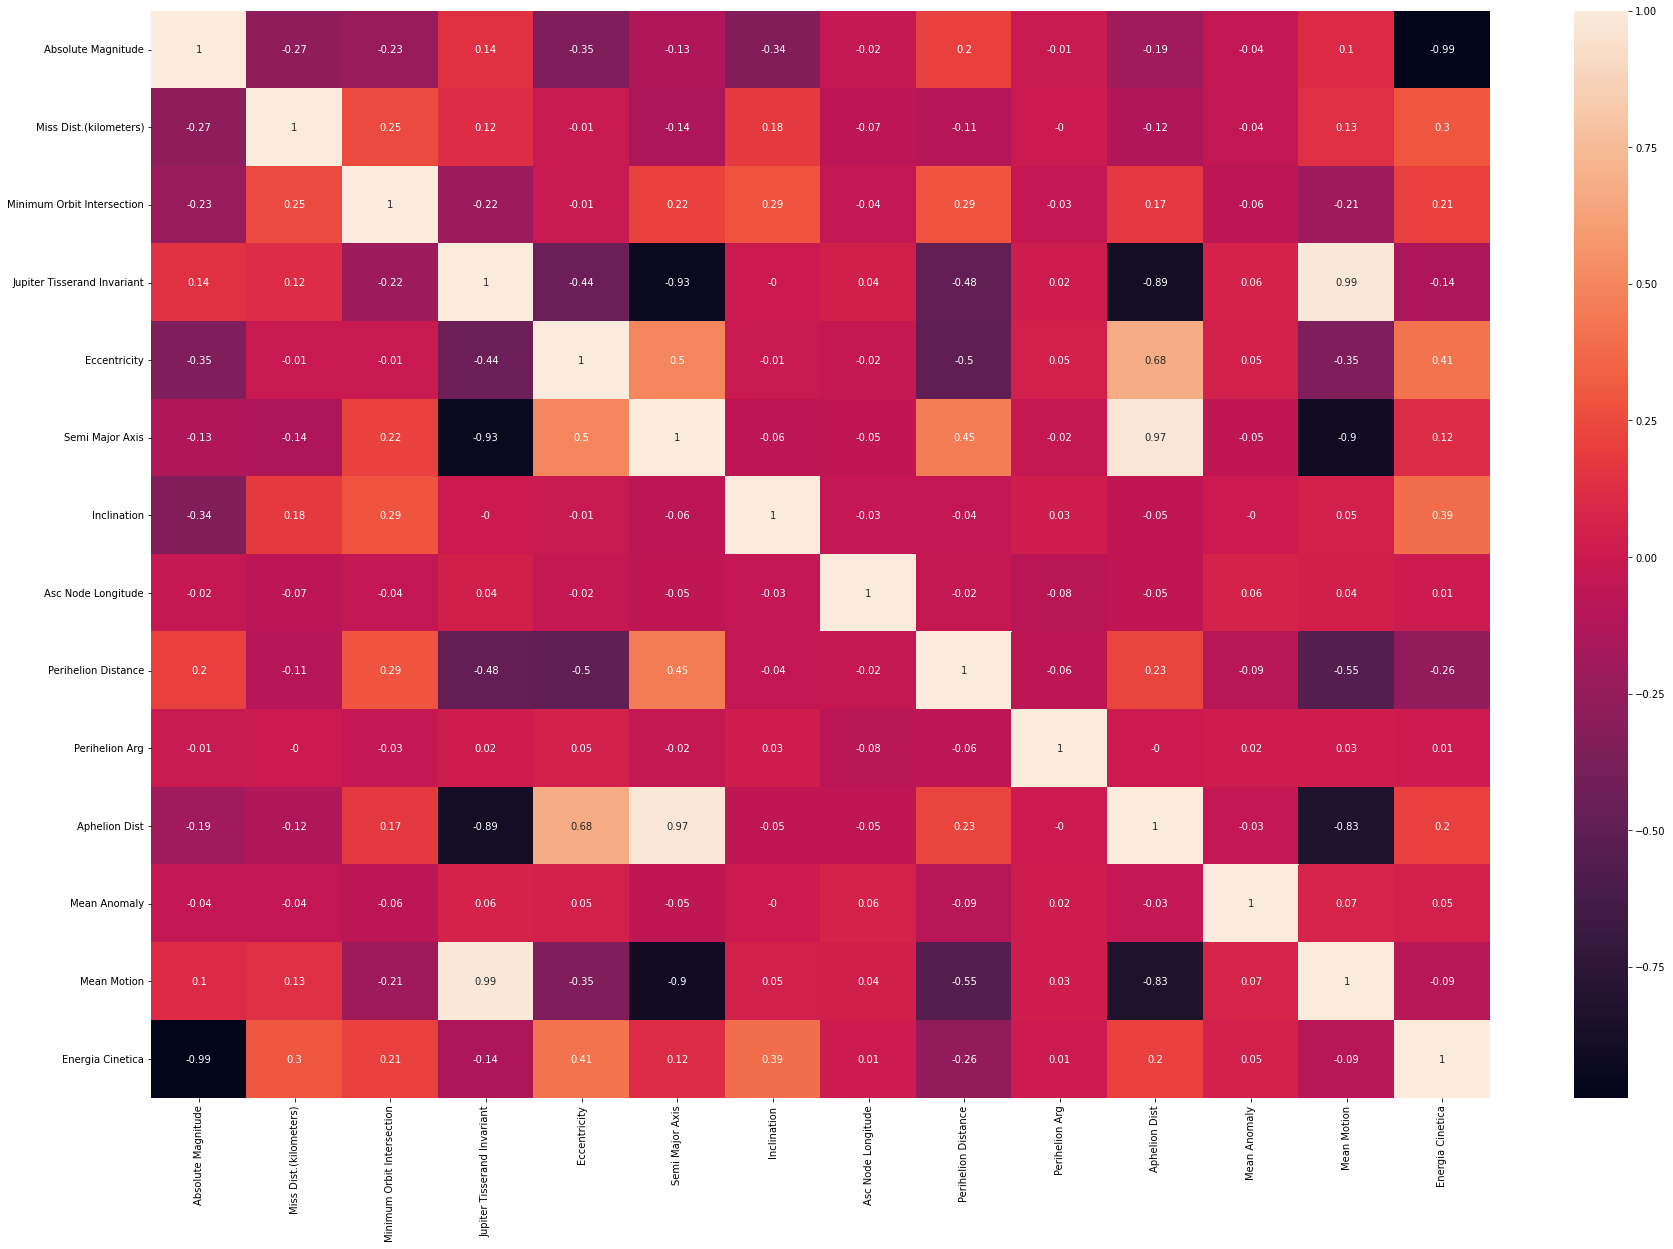

In [ ]:
correlation_matrix = dfn_train.corr().round(2)
plt.figure(figsize = (30,20))
sns.heatmap(data = correlation_matrix, annot = True);

In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(dfn_train)
dfn_std = scaler.transform(dfn_train)
dfn_std= pd.DataFrame(data=dfn_std,columns=dfn.columns)

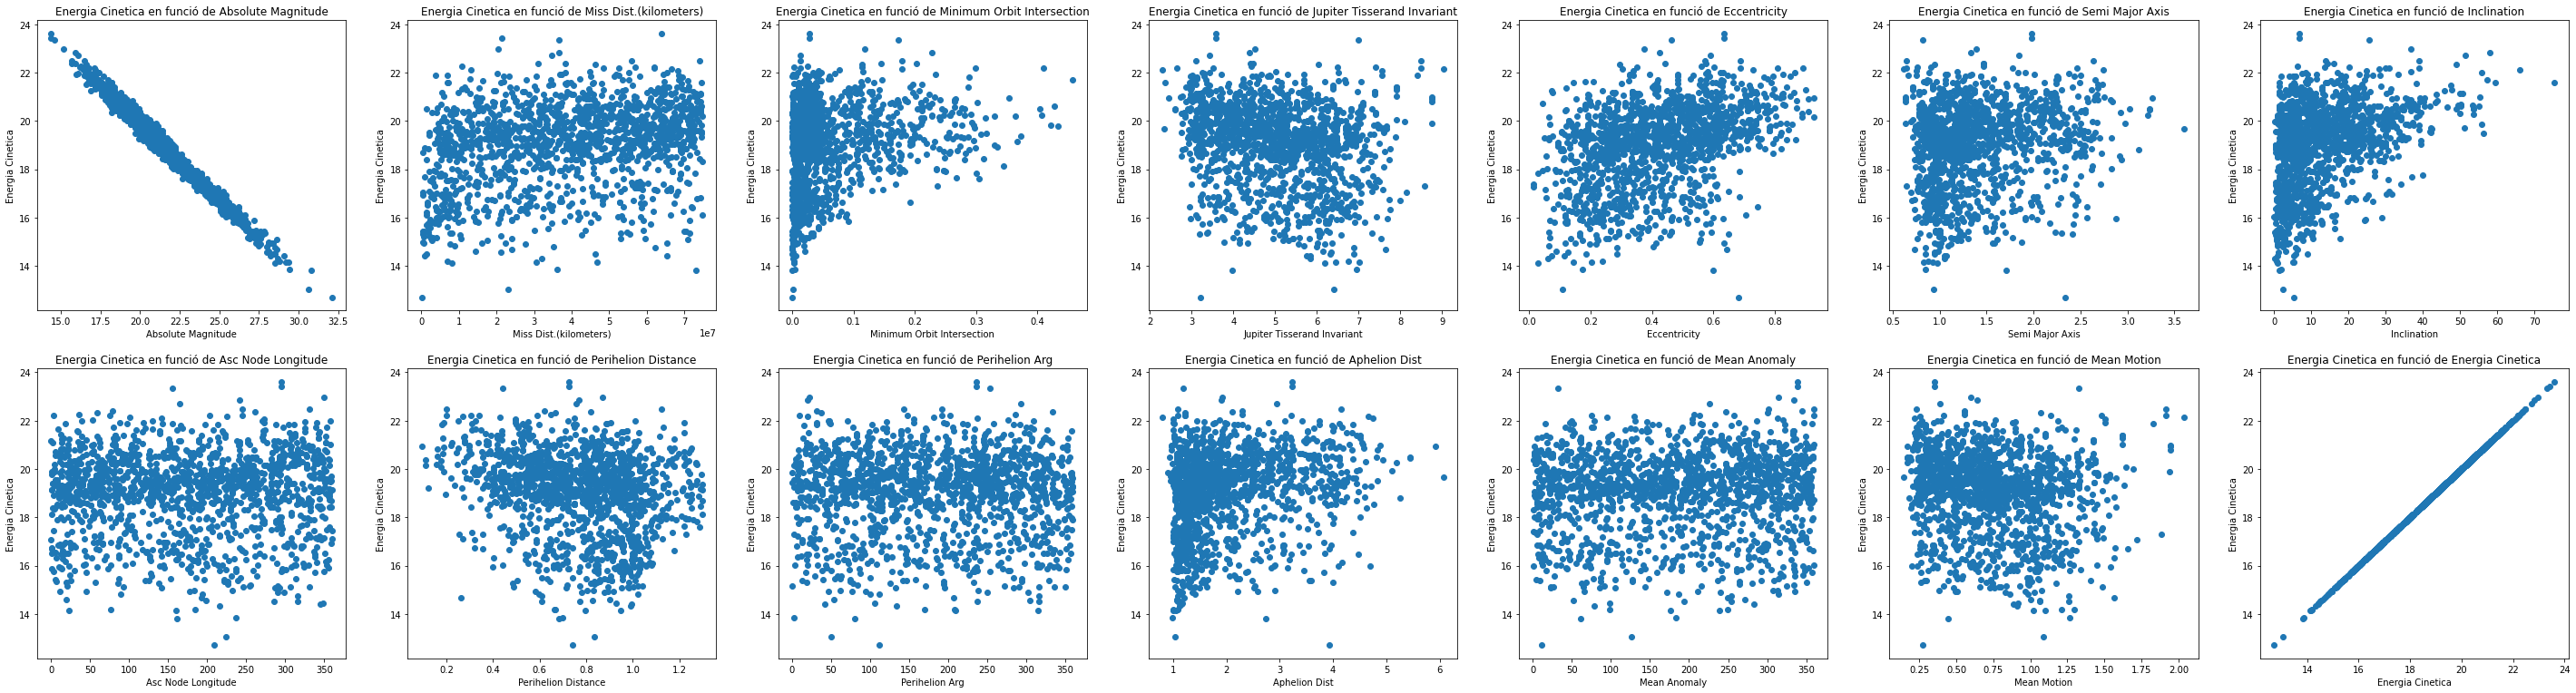

In [ ]:
plt.figure(figsize = (50, 20))

Xgrafic = dfn.columns
Ygrafic = dfn['Energia Cinetica']

for i, col in enumerate(Xgrafic):
    plt.subplot(3, len(Xgrafic)/2 , i+1)
    xi = dfn[col]
    yi = Ygrafic
    plt.scatter(xi, yi)
    plt.title("Energia Cinetica en funció de " + col)
    plt.xlabel(col)
    plt.ylabel('Energia Cinetica')

Es veu clarament la correlació lineal del logaritme de l'energia cinètica amb la magnitud absoluta. Diverses variables com la inclinació i l'excentricitat mostren certa correlació logarítmica, ja que hem pres el logaritme de l'energia cinètica.

**Previsualització amb PCA**

Faig PCA per visualitzar les correlacions.

In [ ]:
pca2 = PCA()
pca2 = PCA().fit(dfn_std)
X_pca2 = pca2.transform(dfn_std)
y = dfn_std['Energia Cinetica']
pca_df = pd.DataFrame({"PC0": X_pca2[:, 0], "PC1": X_pca2[:, 1]})
print(np.cumsum(pca2.explained_variance_ratio_))

[0.31353925 0.50343742 0.6228921  0.70191304 0.77307101 0.83755465
 0.89491867 0.94541008 0.98636467 0.99724211 0.99967337 0.99994871
 1.         1.        ]


Les dues primeres dimensions del PCA expliquen el 50% de la variància. Podem visualitzar les dades però no ens serveix per fer regressions ja que perderíem massa informació.

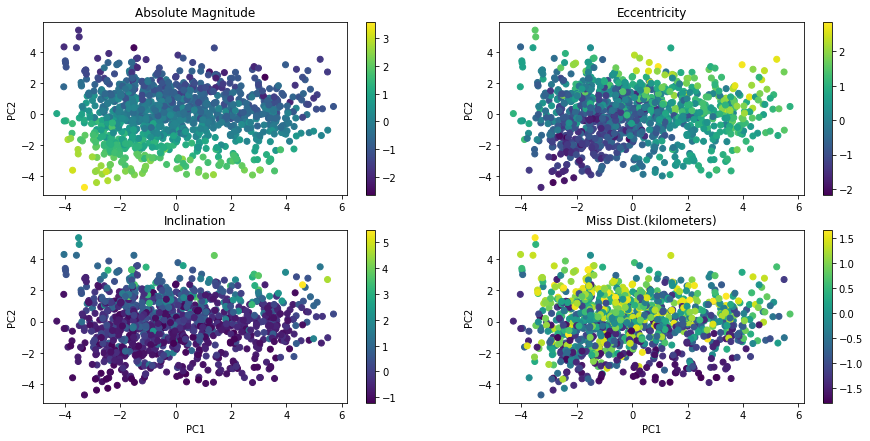

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (15,7))

im1 = ax[0,0].scatter(pca_df['PC0'], pca_df['PC1'], c = dfn_std['Absolute Magnitude']) 
fig.colorbar(im1, ax = ax[0,0])
im2 = ax[0,1].scatter(pca_df['PC0'], pca_df['PC1'], c = dfn_std['Eccentricity'])
fig.colorbar(im2, ax = ax[0,1])
im3 = ax[1,0].scatter(pca_df['PC0'], pca_df['PC1'], c = dfn_std['Inclination'])
fig.colorbar(im3, ax = ax[1,0])
im4 = ax[1,1].scatter(pca_df['PC0'], pca_df['PC1'], c = dfn_std['Miss Dist.(kilometers)'])
fig.colorbar(im4, ax = ax[1,1])
 
ax[0,0].set_ylabel("PC2") 
ax[0,1].set_ylabel("PC2")
ax[1,0].set_xlabel("PC1"), ax[1,0].set_ylabel("PC2")
ax[1,1].set_xlabel("PC1"), ax[1,1].set_ylabel("PC2")

ax[0,0].set_title("Absolute Magnitude")
ax[0,1].set_title("Eccentricity")
ax[1,0].set_title("Inclination")
ax[1,1].set_title("Miss Dist.(kilometers)");

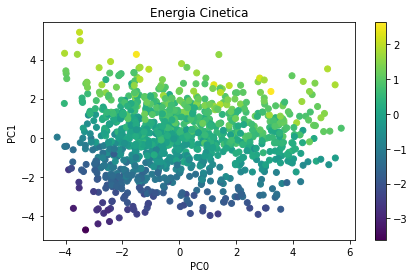

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (7,4))

im1 = ax.scatter(pca_df['PC0'], pca_df['PC1'], c = dfn_std['Energia Cinetica'], marker = 'o') 
fig.colorbar(im1, ax = ax)

ax.set_xlabel("PC0"), ax.set_ylabel("PC1")     
ax.set_title("Energia Cinetica");

A partir dels gràfics podem veure que ja a partir d'una regressió lineal amb la magnitud absoluta podríem obtenir una bona predicció de l'energia cinètica. Incloent-hi la resta de variables, es podria aconseguir una bona predicció utilitzant regressió.

**Elecció de les variables i estandardització**

Degut a que moltes de les correlacions no son lineals no utilitzaré els valors de correlació per a discriminar variables. Com ja no tenim moltes variables i totes estàn relacionades amb les propietats de l'asteroide, les utilitzaré totes.

In [ ]:
X=dfn.drop(columns='Energia Cinetica')
y=dfn['Energia Cinetica']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit(X_train).transform(X_train)
X_test_std = scaler.fit(X_train).transform(X_test)

In [ ]:
model_lineal = LinearRegression()
model_lineal.fit(X_train_std, y_train)

y_pred = model_lineal.predict(X_train_std)
print(mean_squared_error(y_train, y_pred))

scores = -cross_val_score(model_lineal, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())


0.020058988882444687
0.02086198751153324


**Regressió lineal amb regularització**

*LASSO*

In [ ]:
model_lasso = linear_model.LassoCV(alphas = np.logspace(-6, 6, 13), cv = 5)
model_lasso.fit(X_train_std, y_train)

model_lasso.alpha_

1e-06

Elecció del millor hiperparàmetre alpha

In [ ]:
model_lasso = linear_model.Lasso(alpha = 1e-05)
model_lasso.fit(X_train_std, y_train)

scores = -cross_val_score(model_lasso, X_train_std, y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

0.020856738942986053


*Ridge*

In [ ]:
model_ridge = linear_model.RidgeCV(alphas = np.logspace(-6, 6, 13), cv = 5)
model_ridge.fit(X_train_std, y_train)

model_ridge.alpha_

0.1

Elecció del millor hiperparàmetre alpha

In [ ]:
model_ridge = Ridge(alpha = 1.0)
model_ridge.fit(X_train_std, y_train)

scores = -cross_val_score(model_ridge, X_train_std, y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(scores.mean())

0.020874382053410617


**Regressió Polinòmica**

In [ ]:
poly = Pipeline([('poly', PolynomialFeatures(degree = 4)),
                 ('linear', LinearRegression(fit_intercept = True))])
poly.fit(X_train_std, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=4)),
                ('linear', LinearRegression())])

In [ ]:
for i in range(1,5):
  poly = Pipeline([('poly', PolynomialFeatures(degree = i)),
                 ('linear', LinearRegression(fit_intercept = True))])
  poly.fit(X_train_std, y_train)
  y_pred = poly.predict(X_train_std)
  print(f'Error training grau {i}: {mean_squared_error(y_train, y_pred)}')
  scores = -cross_val_score(poly, X_train_std, y_train, cv = 5, scoring = 'neg_mean_squared_error')
  print(f'Error de CV grau {i}: {scores.mean()}\n')

Error training grau 1: 0.02002582776163314
Error de CV grau 1: 0.020939651090151452

Error training grau 2: 0.015266619135840749
Error de CV grau 2: 0.019713469039524943

Error training grau 3: 0.009412586613384946
Error de CV grau 3: 0.44378793155971136

Error training grau 4: 2.159846450479106e-25
Error de CV grau 4: 480.43377304313856



La regressió polinòmica és òptima a grau 2. A partir de 3 tenim un error de training gairebé de 0 però a la cross validation és molt alt.

Només ens queda grau 1 i grau 2. Grau 1 ja ha estat regularitzada ja que és una regressió lineal, ara queda regulatitzar la de grau 2 per escollir la millor.

**Regularització de la regressió polinòmica**

*Ridge*

In [ ]:
alphas = np.logspace(-6, 6, 13)
errors=[]
for i in alphas:
  poly = Pipeline([('poly', PolynomialFeatures(degree = 2)),
                  ('ridge', Ridge(alpha = i))])
  poly.fit(X_train_std, y_train)

  scores = -cross_val_score(poly, X_train_std, y_train, cv = 10, scoring = 'neg_mean_squared_error')
  errors.append(scores.mean())
print(f'Ridge: La alpha optima es {alphas[errors.index(min(errors))]} amb un error CV de {min(errors)}')

Ridge: La alpha optima es 1.0 amb un error CV de 0.018278548835219493


*LASSO*

In [ ]:
errors=[]
for i in alphas:
  poly = Pipeline([('poly', PolynomialFeatures(degree = 2)),
                  ('lasso', linear_model.Lasso(alpha = i))])
  poly.fit(X_train_std, y_train)

  scores = -cross_val_score(poly, X_train_std, y_train, cv = 10, scoring = 'neg_mean_squared_error')
  errors.append(scores.mean())
print(f'LASSO: La alpha optima es {alphas[errors.index(min(errors))]} amb un error CV de {min(errors)}')

LASSO: La alpha optima es 0.001 amb un error CV de 0.018107461193232602


Si utilitzo regressió polinòmica, utilitzaré la regressió polinòmica de grau 2, regularitzat per LASSO amb una alpha de 0.001. És la que té un error més petit.

**Decision Tree i Random Forest**

Decision Tree

In [ ]:
dtr = DecisionTreeRegressor(random_state=0)
-round(cross_val_score(dtr, X_train_std, y_train, cv=5, scoring="neg_mean_squared_error").mean(), 4)

0.0699

La precisió és pitjor a la de la regressió polinòmica, ja que l'error és més gran. Provaré random forest a veure si el resultat és millor.

Random Forest

In [ ]:
rfr = RandomForestRegressor(random_state=0)
-round(cross_val_score(rfr, X_train_std, y_train, cv=5, scoring="neg_mean_squared_error").mean(), 4)

0.0366

L'error de la validació creuada és superior al obtingut en la regressió polinòmica. Utilitzaré la regressió polinòmica.

**TEST**

In [ ]:
poly = Pipeline([('poly', PolynomialFeatures(degree = 2)),
                 ('lasso', linear_model.Lasso(alpha = 1e-03))])
poly.fit(X_train_std, y_train)


y_pred_test = poly.predict(X_test_std)
print(f'Error de Test: {mean_squared_error(y_test, y_pred_test)}')


Error de Test: 0.017468226279673947


Aquest error és molt baix, la precisió és molt alta.

Exemple amb l'asteroide del test de la part 1.

In [ ]:
X_test.iloc[101]

Absolute Magnitude             2.100000e+01
Miss Dist.(kilometers)         4.936100e+07
Minimum Orbit Intersection     1.328480e-02
Jupiter Tisserand Invariant    5.534000e+00
Eccentricity                   2.639759e-01
Semi Major Axis                1.097798e+00
Inclination                    2.628911e+01
Asc Node Longitude             2.376340e+01
Perihelion Distance            8.080059e-01
Perihelion Arg                 2.622293e+02
Aphelion Dist                  1.387590e+00
Mean Anomaly                   6.224996e+01
Mean Motion                    8.568806e-01
Name: 1277, dtype: float64

In [ ]:
exemple=X_test.iloc[101:102].to_numpy()
exemple_escalat = scaler.transform(exemple)
exemple_escalat
poly.predict(exemple_escalat)

array([19.32258538])

Obtenim 10^19.32 Joules , aproximadament 1000 megatons de TNT i equivalent a 20 vegades la bomba atómica més potent. Aquest asteroide és per tant certament perillós i cal vigilar-lo.

**CONCLUSIÓ PART 2**

S'ha obtingut un error molt baix, el model funciona molt bé. Això era d'esperar ja que la variable Absolute Magnitude té una correlació lineal molt forta. Ja només amb aquesta variable assegurem un resultat decent. Juntament les altres variables es pot arribar a un error molt petit. 

Tenint en compte que la intenció era fer un càlcul de l'energia cinética de forma aproximada, aquests resultats són perfectament satisfactoris.